In [258]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [259]:
#Feature matching
#Brute force matching with ORB decriptors

def display(img):
    fig= plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [260]:
single_img = cv2.imread("modi2.png")
single_img  = cv2.cvtColor(single_img,cv2.COLOR_BGR2GRAY)

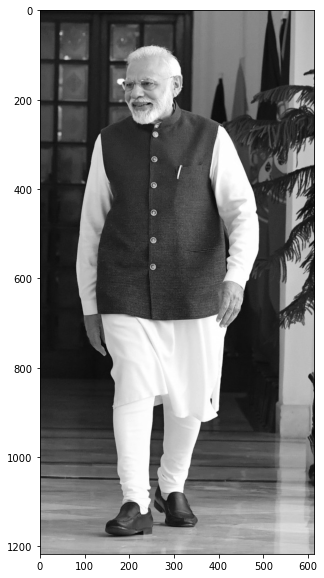

In [261]:
display(single_img)

In [262]:
group_img = cv2.imread("modi1.jpg")
group_img = cv2.cvtColor(group_img,cv2.COLOR_BGR2GRAY)

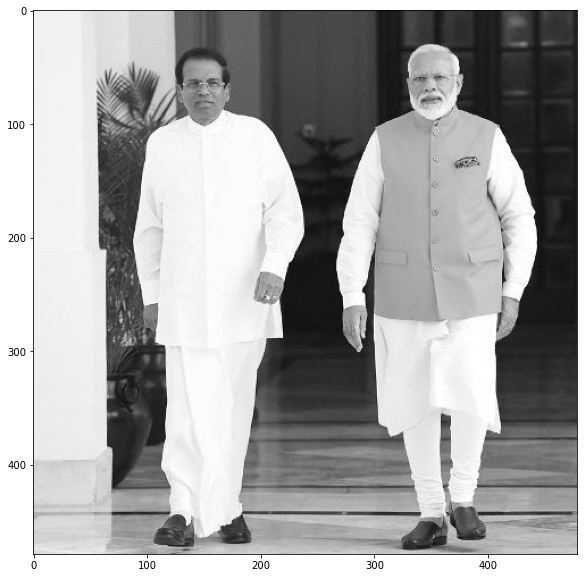

In [263]:
display(group_img)

In [264]:
orb = cv2.ORB_create()

In [265]:
kp1, des1 = orb.detectAndCompute(single_img,None)
kp2, des2 = orb.detectAndCompute(group_img,None)

In [266]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [267]:
matches = bf.match(des1,des2)

In [268]:
#sortes the matches list with the best matching values in the top
matches = sorted(matches,key=lambda x:x.distance)

In [269]:
#can limit how many features need to match by slicing the matches list
single_matches = cv2.drawMatches(single_img,kp1,group_img,kp2,matches[:50],None,flags=2)

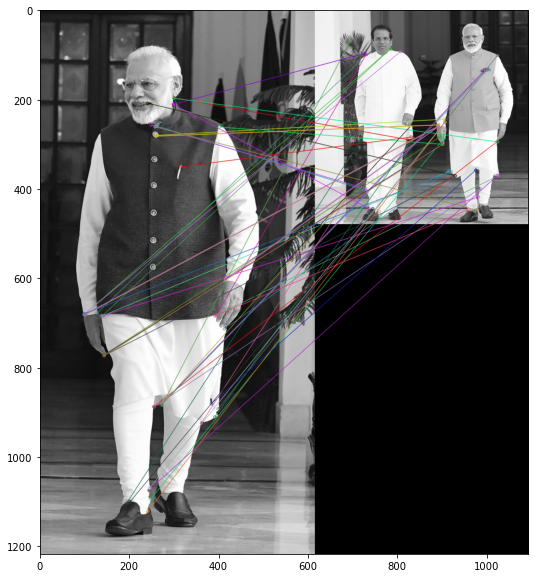

In [270]:
display(single_matches)

In [271]:
#Brute force matching with SIFT descriptors and Ratio test

In [272]:
sift = cv2.xfeatures2d.SIFT_create()

In [273]:
kp1, des1 = sift.detectAndCompute(single_img,None)
kp2,des2 = sift.detectAndCompute(group_img,None)

In [274]:
bf = cv2.BFMatcher()

In [275]:
#gives the list of pair of matches
matches = bf.knnMatch(des1,des2,k=2)

In [276]:
#if match 1 distance is less than 75% of match 2 distance 
#then descriptor was a good match and keep it
#less distance = better match
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [277]:
len(good)

65

In [278]:
len(matches)

1536

In [279]:
sift_matches = cv2.drawMatchesKnn(single_img,kp1,group_img,kp2,good,None,flags=2)

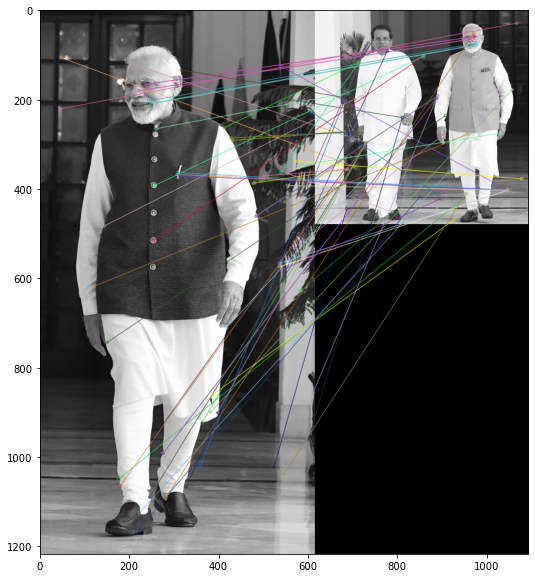

In [280]:
display(sift_matches)

In [281]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,tress=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [282]:
matches = flann.knnMatch(des1,des2,k=2)

In [283]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        good.append([match1])

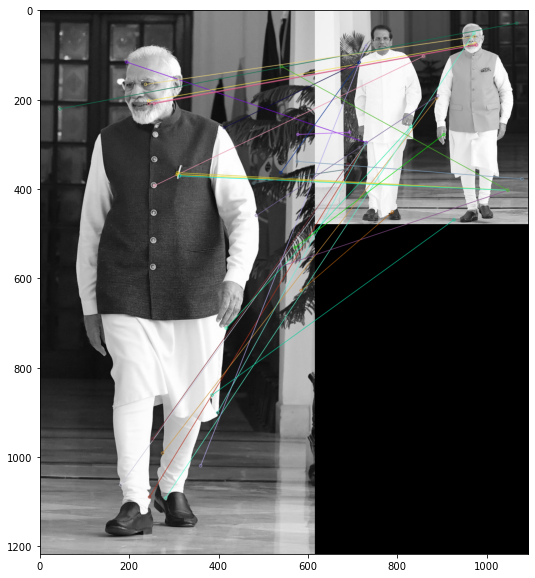

In [284]:
flann_matches = cv2.drawMatchesKnn(single_img,kp1,group_img,kp2,good,None,flags=2)
display(flann_matches)